In [1]:
import pandas as pd
from os.path import join
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#r2 and pearson r
from sklearn.metrics import r2_score


plt.style.use('CCB_plot_style_0v4.mplstyle');
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']

def load_experimental_data(df, n, set_name, data_path, dataset):
    with open(join(data_path, dataset, "experimental", str(n), set_name + ".txt")) as f:
        lines = f.readlines()

    ind = [int(ind.replace("\n", "")) for ind in lines]
    seqs = [df.iloc[i]["sequence"] for i in ind]
    scores = [df.iloc[i]["score"] for i in ind]
    return seqs, scores


def normalize_data(scores, dataset, data_path, training_size):
    df = pd.read_csv(join(data_path, dataset, "experimental", dataset + "_with_sequence.tsv"), sep = "\t")
    train_seqs, train_scores = load_experimental_data(df, training_size, "train", data_path, dataset)
    train_mean = np.mean(train_scores)
    train_std = np.std(train_scores)
    return [(score - train_mean) / train_std for score in scores]


Bad key text.latex.preview in file CCB_plot_style_0v4.mplstyle, line 55 ('text.latex.preview  : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file CCB_plot_style_0v4.mplstyle, line 63 ('mathtext.fallback_to_cm : True ## When True, use symbols from the Computer Modern fonts')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [2]:
datasets = ["gb1", "pab1", "avgfp", "dlg4-2022-binding",  "grb2-abundance", "grb2-binding", "tem-1", "ube4b"]
training_set_sizes = [50, 100, 200, 500, 1000, 2000, 5000]

dataset_title_dict = {"gb1" : "Protein G binding to IgG-Fc",
                "pab1" : "Pab1 binding to mRNA",
                "avgfp" : "GFP Brightness",
                "dlg4-2022-binding" : "PSD-95 binding to CRIPT",
                "grb2-abundance" : "Grb2 abundance",
                   "grb2-binding" : "Grb2 binding to GAB2",
                   "tem-1" : " TEM-1 Beta-lactamase \n ampicillin resistance",
                     "ube4b" : "E4B ubiquitin ligase activity",
                       "average" : "Average"}

## Figure 2

In [3]:
METL_R2s = []
MEAN_R2s = []
PRODIT_R2s = []

for dataset in datasets:
    all_METL_r2s = []
    all_MEAN_r2s = []
    all_PRODIT_r2s = []
    for n in training_set_sizes:
        y_pred = np.load("./data/" + dataset + "/predictions/METL_test_predictions_"+str(n)+".npy")
        y_true = np.load("data/" + dataset + "/predictions/METL_test_targets_"+str(n)+".npy")
        r2 = r2_score(y_true, y_pred)
        all_METL_r2s.append(r2)
        try:
            y_pred = np.load("./data/" + dataset + "/predictions/"+str(n)+"/test_predictions.npy")
            y_true = np.load("./data/" + dataset + "/predictions/"+str(n)+"/test_true.npy")
            y_pred_metl = np.load("./data/" + dataset + "/predictions/METL_test_predictions_"+str(n)+".npy")
            r2 = r2_score(y_true, y_pred)
            all_PRODIT_r2s.append(r2)

            y_pred_metl = normalize_data(y_pred_metl, dataset, "data", str(n))
            y_pred_mean = (y_pred + y_pred_metl)/2
            r2_mean = r2_score(y_true, y_pred_mean)
            all_MEAN_r2s.append(r2_mean)
            
        except:
            all_MEAN_r2s.append(r2)
            all_PRODIT_r2s.append(r2)
    print(dataset)
    print(all_METL_r2s)
    METL_R2s.append(all_METL_r2s)
    MEAN_R2s.append(all_MEAN_r2s)
    PRODIT_R2s.append(all_PRODIT_r2s)



METL_R2s = np.array(METL_R2s)
METL_R2s = np.mean(METL_R2s, axis = 0)

MEAN_R2s = np.array(MEAN_R2s)
MEAN_R2s = np.mean(MEAN_R2s, axis = 0)

PRODIT_R2s = np.array(PRODIT_R2s)
PRODIT_R2s = np.mean(PRODIT_R2s, axis = 0)

print("Averafe R2s")
print(METL_R2s)
print(PRODIT_R2s)
print(MEAN_R2s)

gb1
[0.4465311978126638, 0.5209990824255508, 0.6603255118197358, 0.7427725145990445, 0.820301767967092, 0.8811736450344606, 0.9114000129483669]
pab1
[0.34914836456309206, 0.42677895908342856, 0.5664963261515024, 0.7213525917069079, 0.759598194244636, 0.8219065300827959, 0.837848303481575]
avgfp
[0.4786560173802997, 0.507598160818391, 0.574442961310492, 0.6681141646871698, 0.747340431655676, 0.8706369616487675, 0.9128033812692672]
dlg4-2022-binding
[0.35998391508942384, 0.48551247837567524, 0.5165313978080504, 0.6314468041392959, 0.6535084358504296, 0.7257458788382667, 0.779473970872506]
grb2-abundance
[0.36549493771239305, 0.4779207760921341, 0.47921033504786126, 0.6115891852380122, 0.7294289401774731, 0.7886143283629659, 0.8354773752854301]
grb2-binding
[0.38112336364728827, 0.43216915559751945, 0.48510937026636836, 0.6563195230382741, 0.7120802814286513, 0.7464917426080117, 0.7790734611041751]
tem-1
[0.09013787034203136, 0.3003706403700196, 0.5360470117529837, 0.6742958346401493, 0.7

gb1
[0.4488183571104758, 0.6085823928544216, 0.7179923857784765, 0.8029765264102864, 0.8536951948546213, 0.8998315184760268, 0.9207025369863877]
[0.475656477954297, 0.5973679706752233, 0.7221730027697401, 0.7994899632662723, 0.8525513783119539, 0.9004931644823329, 0.9243921263599011]
[0.4465311978126638, 0.5209990824255508, 0.6603255118197358, 0.7427725145990445, 0.820301767967092, 0.8811736450344606, 0.9114000129483669]
 
pab1
[0.38277930540111504, 0.4311347031167626, 0.58570464042488, 0.7237445930456341, 0.7909213569894986, 0.816860328573412, 0.853774702732825]
[0.4015994927328629, 0.46482095759142095, 0.6071520208799199, 0.7454363250425071, 0.7958145020464392, 0.8391397681438135, 0.8594498649549293]
[0.34914836456309206, 0.42677895908342856, 0.5664963261515024, 0.7213525917069079, 0.759598194244636, 0.8219065300827959, 0.837848303481575]
 
avgfp
[0.48920926561527966, 0.5331939170508591, 0.6069091375555655, 0.7607011352313431, 0.8254196833143952, 0.8811831032974179, 0.921061893102304

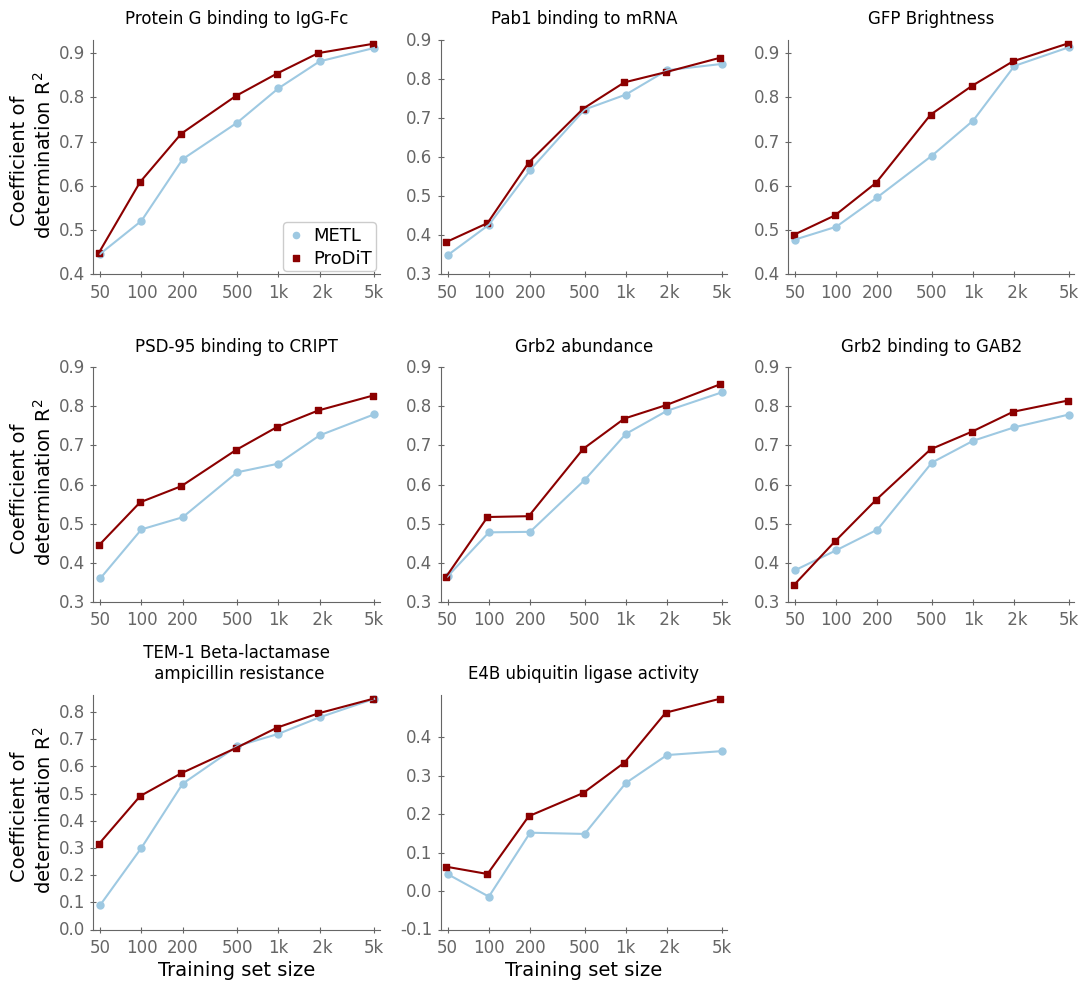

0.9107142857142857
51 56


In [4]:
# Create a 3x3 grid of subplots (with 9 positions, accommodating up to 9 datasets)
fig, axes = plt.subplots(3, 3, figsize=(11, 10))
axes = axes.flatten()  # Flatten for easy 1D indexing

count_improved = 0
total_count = 0

for idx, dataset in enumerate(datasets):
    ax = axes[idx]

    if dataset == "average":
        #ax.scatter(np.log10(training_set_sizes)+0.01, MEAN_R2s,  label= "ProDiT + METL", c = "#E05C5C", marker= "^")
        #ax.plot(np.log10(training_set_sizes)+0.01, MEAN_R2s, c = "#E05C5C")
        
        
        ax.scatter(np.log10(training_set_sizes), METL_R2s, label="METL", c = "#9EC9E2")
        ax.plot(np.log10(training_set_sizes), METL_R2s, c = "#9EC9E2")

        ax.scatter(np.log10(training_set_sizes)-0.01, PRODIT_R2s, label="ProDiT", c = "#8B0000", marker = "s")
        ax.plot(np.log10(training_set_sizes)-0.01, PRODIT_R2s, c = "#8B0000")


        y_max = int(np.ceil(max(list(PRODIT_R2s) + list(MEAN_R2s) + list(METL_R2s))*10))/10
        y_min = int(np.floor(min(list(PRODIT_R2s) + list(MEAN_R2s) + list(METL_R2s))*10))/10
        y_ticks = np.arange(y_min, y_max, 0.1)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(np.round(y_ticks,1), fontsize = 12)


    else:
        all_r2s_metl = []
        for n in training_set_sizes:
            y_pred = np.load("./data/" + dataset + "/predictions/METL_test_predictions_"+str(n)+".npy")
            y_true = np.load("data/" + dataset + "/predictions/METL_test_targets_"+str(n)+".npy")
            r2 = r2_score(y_true, y_pred)
            all_r2s_metl.append(r2)
        

        all_r2s = []
        sizes = []
        all_r2s_mean = []
        for n in training_set_sizes:
            try:
                y_pred = np.load("./data/" + dataset + "/predictions/"+str(n)+"/test_predictions.npy")
                y_true = np.load("./data/" + dataset + "/predictions/"+str(n)+"/test_true.npy")
                y_pred_metl = np.load("./data/" + dataset + "/predictions/METL_test_predictions_"+str(n)+".npy")
                
                r2 = r2_score(y_true, y_pred)
                all_r2s.append(r2)
                sizes.append(n)
                if dataset in  ["gb1", "avgfp",  "dlg4-2022-binding",  "grb2-abundance", "grb2-binding",  "pab1", "tem-1", "ube4b"]:
                    y_pred_metl = normalize_data(y_pred_metl, dataset, "data", str(n))
                y_pred_mean = (y_pred + y_pred_metl)/2
                r2_mean = r2_score(y_true, y_pred_mean)
                all_r2s_mean.append(r2_mean)
                
            except:
                pass
        
        
        print(dataset)
        print(all_r2s)
        print(all_r2s_mean)
        print(all_r2s_metl)
        print(" ")
        #if len(all_r2s) > 1:
        #ax.scatter(np.log10(sizes)+0.01, all_r2s_mean,  label= "ProDiT + METL", c = "#E05C5C", marker= "^")
        #ax.plot(np.log10(sizes)+0.01, all_r2s_mean, c = "#E05C5C")
        

        count_improved += sum([all_r2s[i] > all_r2s_metl[i] for i in range(len(all_r2s))])
        total_count += len(all_r2s)
            
                
        ax.scatter(np.log10(training_set_sizes), all_r2s_metl, label="METL", c = "#9EC9E2")
        ax.plot(np.log10(training_set_sizes), all_r2s_metl, c = "#9EC9E2")

        ax.scatter(np.log10(sizes)-0.01, all_r2s, label="ProDiT", c = "#8B0000", marker = "s")
        ax.plot(np.log10(sizes)-0.01, all_r2s, c = "#8B0000")

        y_max = int(np.ceil(max(all_r2s_metl + all_r2s + all_r2s_mean)*10))/10
        y_min = int(np.floor(min(all_r2s_metl + all_r2s + all_r2s_mean)*10))/10
        y_ticks = np.arange(y_min, y_max, 0.1)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(np.round(y_ticks,1), fontsize = 12)



    ax.set_title(dataset_title_dict[dataset])
    x_ticks = [50, 100,200, 500,1000, 2000, 5000]
    ax.set_xticks(np.log10(x_ticks))
    ax.set_xticklabels(["50", "100","200", "500","1k", " 2k", "5k"], fontsize = 12)


    


    if idx == 0:
        ax.legend(loc='lower right', fontsize=13, frameon=True, facecolor='white', framealpha=1)
    if idx % 3 == 0:
        ax.set_ylabel("Coefficient of \n determination $R^2$", fontsize = 14)

    if idx >= 6:
        ax.set_xlabel("Training set size", fontsize = 14)

    
# Remove any unused axes if the datasets are fewer than 9
for idx in range(len(datasets), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig("figures/METL_vs_ProDiT.eps")
plt.show()

# Calculate the fraction of datasets where ProDiT outperforms METL
print(count_improved / total_count)
print(count_improved, total_count)

## Figure S4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


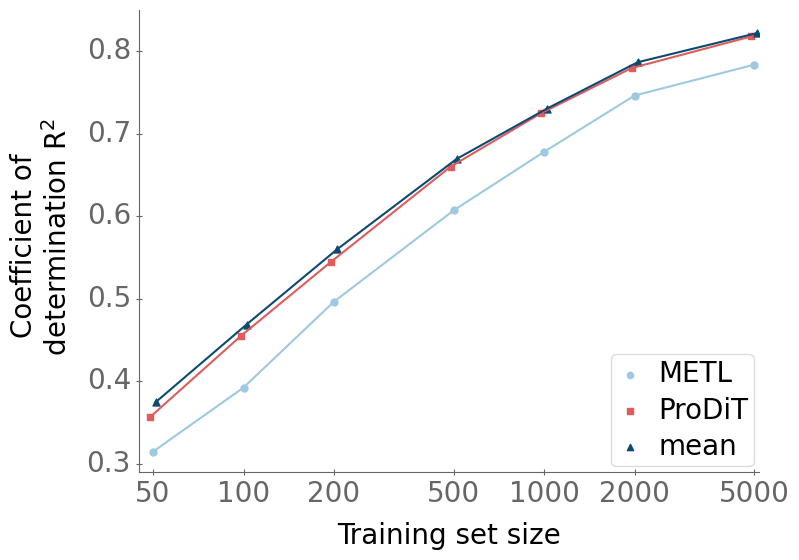

In [5]:





plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 20})

plt.scatter(np.log10(training_set_sizes), METL_R2s, label= "METL", c = "#9EC9E2")
plt.plot(np.log10(training_set_sizes), METL_R2s, c = "#9EC9E2")
plt.scatter(np.log10(training_set_sizes)-0.01, PRODIT_R2s, label="ProDiT", c = "#E05C5C", marker = "s")
plt.plot(np.log10(training_set_sizes)-0.01, PRODIT_R2s, c = "#E05C5C")
plt.scatter(np.log10(training_set_sizes)+0.01, MEAN_R2s, label= "mean", c = "#0D4A70", marker= "^")
plt.plot(np.log10(training_set_sizes)+0.01, MEAN_R2s, c = "#0D4A70")


x_ticks = training_set_sizes
plt.xticks(np.log10(x_ticks), x_ticks)
plt.ylabel('Coefficient of \n determination $R^2$', labelpad=10)
plt.xlabel('Training set size', labelpad=10)

y_ticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
plt.yticks(y_ticks, y_ticks)

plt.xlim(np.log10(45), np.log10(5200))
plt.ylim(0.29, 0.85)
#add frame to legend:
plt.legend(loc = "lower right", frameon=True)
plt.savefig("figures/mean_prediction.eps")
plt.show()